In [ ]:
import pandas as pd

# https://surpriselib.com/
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Import User Likes
likes_df = pd.read_csv("../data/input/user_likes.csv")

# Import User Recents
recent_df = pd.read_csv("../data/input/user_recent.csv")

# Import Movie Info
movie_info = pd.read_csv("../data/input/movie_dataset/img.csv")


In [3]:
target_user = "user_001"

In [4]:
# Convert DataFrame into Surprise Format
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(likes_df[["user_id", "movie_id"]].assign(rating=1.0), reader)

# Train/test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
svd = SVD()
svd.fit(trainset)

# Predict for a given user
def recommend_for_user_svd(user_id, top_k=5):
    all_movies = likes_df["movie_id"].unique()
    rated_movies = set(likes_df[likes_df["user_id"] == user_id]["movie_id"])

    # Predict score for all unseen movies
    predictions = [
        (movie, svd.predict(user_id, movie).est)
        for movie in all_movies if movie not in rated_movies
    ]

    # Sort by predicted rating
    top_movies = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_k]
    return [movie for movie, score in top_movies]

recomm_movies = recommend_for_user_svd(user_id=target_user)

recomm_movies

['tt1059786', 'tt1415283', 'tt1533749', 'tt1031562', 'tt0120828']

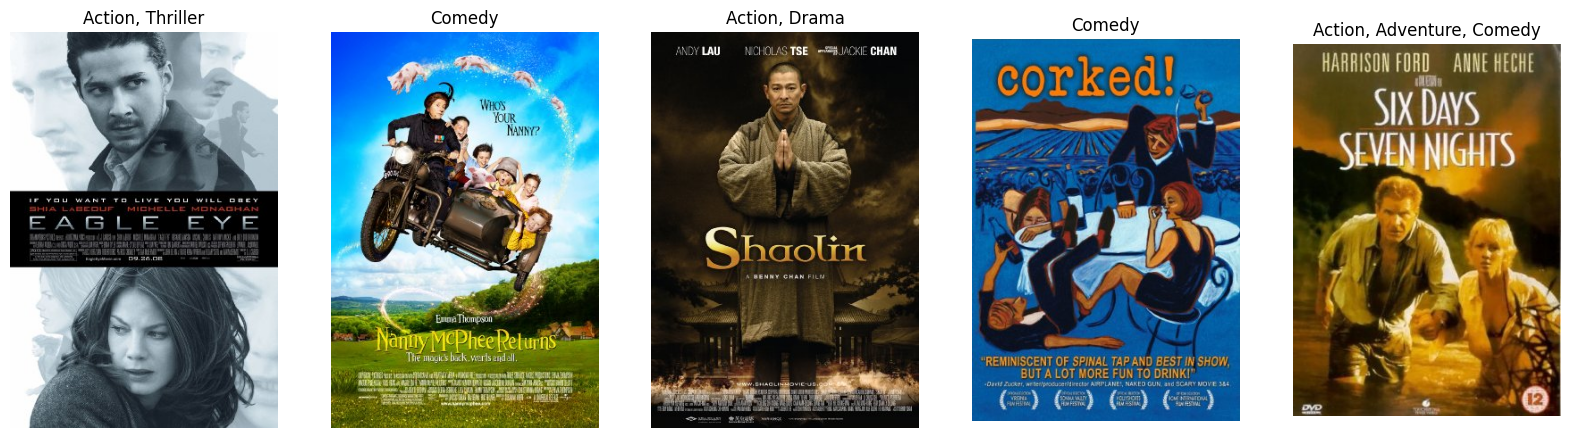

In [5]:
show_num = 5

fig, ax = plt.subplots(1, show_num, figsize= (20,10))

for idx, movie in enumerate(recomm_movies):
    img_path = f"../data/input/movie_dataset/img/{movie}.jpg"
    img = Image.open(img_path).convert("RGB")

    movie_genre = movie_info[movie_info["id"] == movie]["genre"].values[0]

    ax[idx].imshow(img)
    ax[idx].set_title(movie_genre)
    ax[idx].axis("off")

plt.show()